In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

from sklearn import tree
import graphviz 
import os
from sklearn import preprocessing 

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


In [ ]:
data = pd.read_csv('/content/Iris (1).csv')

In [ ]:
data.isnull().sum().sum()


0

In [ ]:
setosa = data[data['Species'] == 'Iris-setosa']
versicolor = data[data['Species'] == 'Iris-versicolor']
virginica = data[data['Species'] == 'Iris-virginica']

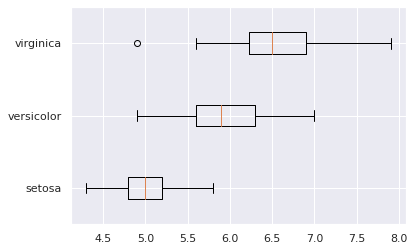

In [ ]:
feature = 'SepalLengthCm'

bp_data = [setosa[feature], versicolor[feature], virginica[feature]]
plt.boxplot(bp_data, vert=False, labels=['setosa', 'versicolor', 'virginica'])
plt.show()

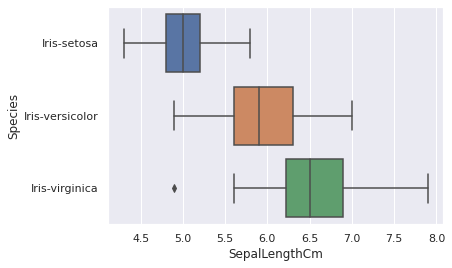

In [ ]:
sns.boxplot(x='SepalLengthCm', y='Species', data=data)
plt.show()

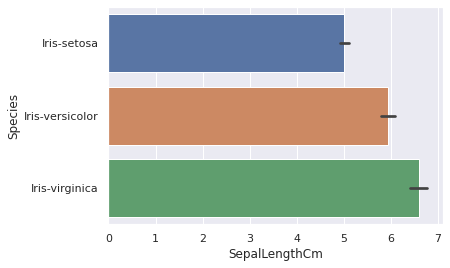

In [ ]:
sns.barplot(x='SepalLengthCm', y='Species', data=data)
plt.show()

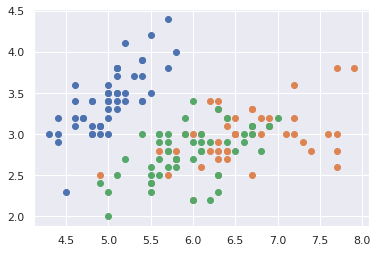

In [ ]:
plt.scatter(setosa['SepalLengthCm'].values, setosa['SepalWidthCm'].values)
plt.scatter(virginica['SepalLengthCm'].values, virginica['SepalWidthCm'].values)
plt.scatter(versicolor['SepalLengthCm'].values, versicolor['SepalWidthCm'].values)
plt.show()

In [ ]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=setosa)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=virginica)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=versicolor)
plt.show()

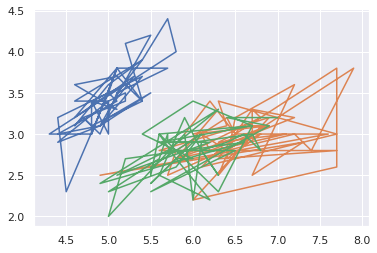

In [ ]:
plt.plot(setosa['SepalLengthCm'].values, setosa['SepalWidthCm'].values)
plt.plot(virginica['SepalLengthCm'].values, virginica['SepalWidthCm'].values)
plt.plot(versicolor['SepalLengthCm'].values, versicolor['SepalWidthCm'].values)
plt.show()

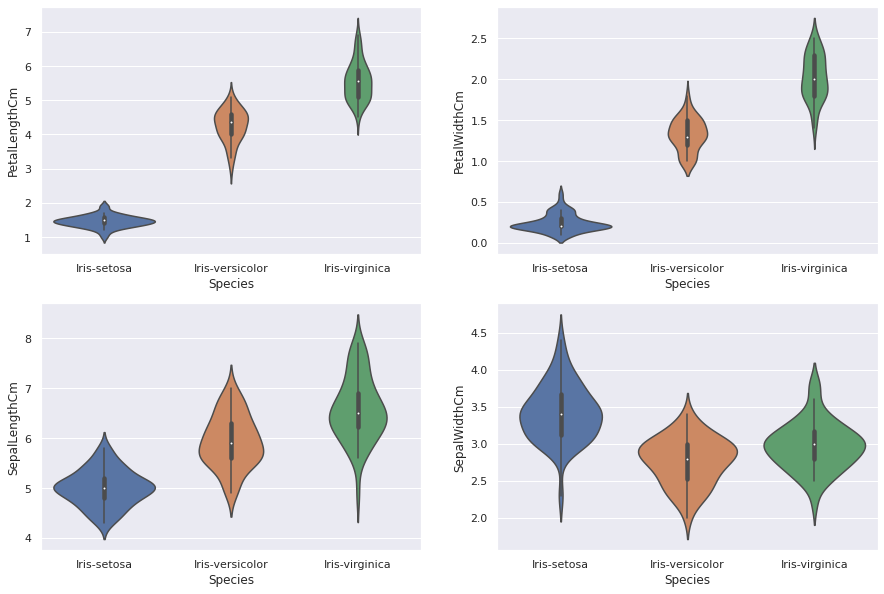

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

In [ ]:
species_mapping = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [ ]:
data['Species'] = data['Species'].map(species_mapping)


In [ ]:
print(data['Species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [ ]:
X=data.drop(['Id','Species'],axis=1)
y=data['Species']

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 150
Total # of sample in train dataset: 100
Total # of sample in test dataset: 50


In [ ]:
LogReg = LogisticRegression()

In [ ]:
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = LogReg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.98

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
accuracy_score(pred, y_test)

[[15  0  0]
 [ 0 22  0]
 [ 0  1 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        22
           2       1.00      0.92      0.96        13

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



0.98

In [ ]:
from sklearn.svm import SVC


In [ ]:
classifier = SVC()
classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[15  0  0]
 [ 0 21  1]
 [ 0  0 13]]


In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


accuracy is 0.98


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
classifier = DecisionTreeClassifier()


In [ ]:
classifier.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[15  0  0]
 [ 0 21  1]
 [ 0  0 13]]


In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


accuracy is 0.98
